# Linear Regression Checkpoint

This checkpoint is designed to test your understanding of linear regression.

Specifically, this will cover:

* Creating simple and multiple linear regression models with StatsModels
* Interpreting linear regression model metrics
* Interpreting linear regression model parameters

## Your Task: Build Linear Regression Models to Predict Home Prices

### Data Understanding

You will be using the Ames Housing dataset, modeling the `SalePrice` using these numeric features:

* `GrLivArea`: Above grade living area (square feet)
* `GarageArea`: Size of garage (square feet)
* `LotArea`: Lot size (square feet)
* `LotFrontage`: Length of street connected to property (feet)

In [1]:
# Run this cell without changes

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("ames.csv", index_col=0)
df = df[["SalePrice", "GrLivArea", "GarageArea", "LotArea", "LotFrontage"]].copy()
df.dropna(inplace=True)
df

,SalePrice,GrLivArea,GarageArea,LotArea,LotFrontage
Id,,,,,
1,208500,1710,548,8450,65.0
2,181500,1262,460,9600,80.0
3,223500,1786,608,11250,68.0
4,140000,1717,642,9550,60.0
5,250000,2198,836,14260,84.0
...,...,...,...,...,...
1456,175000,1647,460,7917,62.0
1457,210000,2073,500,13175,85.0
1458,266500,2340,252,9042,66.0


### Modeling

You will apply an inferential modeling process using StatsModels. This means that you are trying to create the best model in terms of variance in `SalePrice` that is explained (i.e. R-Squared).

You will build **two models — one simple linear regression model and one multiple linear regresssion model** — then you will interpret the model summaries.

There are two relevant components of interpreting the model summaries: model **metrics** such as r-squared and p-values, which tell you how well your model is fit to the data, and model **parameters** (intercept and coefficients), which tell you how the model is using the feature(s) to predict the target.

### Requirements

## 1. Build a Simple Linear Regression Using StatsModels

Below, we use the `.corr()` method to find which features are most correlated with `SalePrice`:

In [2]:
# Run this cell without changes
df.corr()["SalePrice"]

SalePrice      1.000000
GrLivArea      0.703557
GarageArea     0.631761
LotArea        0.311416
LotFrontage    0.351799
Name: SalePrice, dtype: float64

The `GrLivArea` feature has the highest correlation with `SalePrice`, so we will use it to build a simple linear regression model.

Use the OLS model ([documentation here](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)) with:

- `SalePrice` as the endogenous (dependent) variable
- `GrLivArea` as the exogenous (independent) variable

Don't forget to include `sm.add_constant` to ensure that there is an intercept term.

Fill in the appropriate values in the cell below.

In [13]:
# assigning variables
import statsmodels.api as sm
endog = df['SalePrice']
exog = sm.add_constant(df['GrLivArea'])

In [14]:
endog

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1201, dtype: int64

In [15]:
exog

,const,GrLivArea
Id,,
1,1.0,1710
2,1.0,1262
3,1.0,1786
4,1.0,1717
5,1.0,2198
...,...,...
1456,1.0,1647
1457,1.0,2073
1458,1.0,2340


In [40]:

import seaborn as sns

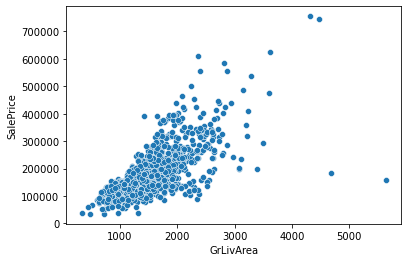

In [45]:

## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = df['GrLivArea'], y = df['SalePrice']);

In [46]:
# CodeGrade step1

import statsmodels.api as sm

# Replace None with appropriate code
simple_model = sm.OLS(endog=endog, exog=exog)

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1175.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          4.39e-180
Time:                        10:48:42   Log-Likelihood:                -14902.
No. Observations:                1201   AIC:                         2.981e+04
Df Residuals:                    1199   BIC:                         2.982e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.347e+04   5171.332      2.605      0.0

In [18]:
# RESUTLS
# r_squared = 0.495, 49.5% of the variance is explained by this model
# f_stat = 4.39e-180
# p = <<<< 0.5
# t_stat = 34.281

In [25]:
# simple_model should be an OLS model
assert type(simple_model) == sm.OLS

# simple_model should have 1 feature (other than the constant)
assert simple_model.df_model == 1

## 2. Interpret Simple Linear Regression Model Metrics

We want to know:

1. How much of the variance is explained by this model? This is also known as the R-Squared. Fill in `r_squared` with this value — a floating point number between 0 and 1.
2. Is the model statistically significant at $\alpha = 0.05$? This is determined by comparing the probability of the f-statistic to the alpha. Fill in `model_is_significant` with this value — either `True` or `False`.

You can either just look at the print-out above and fill in the values, or you can use attributes of `simple_model_results` ([documentation here](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html)). If you are getting stuck, it's usually easier to type the answer in rather than writing code to do it.

In [31]:
simple_model_results.tvalues

const         2.604830
GrLivArea    34.281475
dtype: float64

In [32]:
simple_model_results.f_pvalue

4.386383022975568e-180

In [34]:
# CodeGrade step2
# Replace None with appropriate code
r_squared = 0.495
model_is_significant = True

In [35]:
import numpy as np

# r_squared should be a floating point value between 0 and 1
assert 0 <= r_squared and r_squared <= 1
assert type(r_squared) == float or type(r_squared) == np.float64

# model_is_significant should be True or False
assert model_is_significant == True or model_is_significant == False

## 3. Interpret Simple Linear Regression Parameters

Now, we want to know what relationship the model has found between the feature and the target. Because this is a simple linear regression, it follows the format of $y = mx + b$ where $y$ is the `SalePrice`, $m$ is the slope of `GrLivArea`, $x$ is `GrLivArea`, and $b$ is the y-intercept (the value of $y$ when $x$ is 0).

In the cell below, fill in appropriate values for `m` and `b`. Again, you can use the print-out above or use attributes of `simple_model_results`.

In [48]:
simple_model_results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.347e+04,5171.332,2.605,0.009,3324.573,2.36e+04
GrLivArea,110.7117,3.229,34.281,0.000,104.376,117.048


In [49]:
# CodeGrade step3
# Replace None with appropriate code

# Slope 
m = 110.7117

# Intercept
b = 1.347e+04

print(f"""
Our simple linear regression model found a y-intercept
of ${round(b, 2):,}, then for every increase of 1 square foot
above-ground living area, the price increases by ${round(m, 2)} 
""")


Our simple linear regression model found a y-intercept
of $13,470.0, then for every increase of 1 square foot
above-ground living area, the price increases by $110.71 



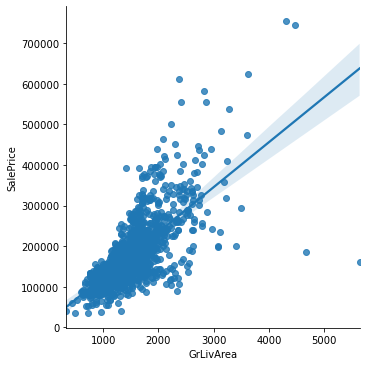

In [69]:
sns.lmplot(data=df, x="GrLivArea", y="SalePrice");

In [50]:
from numbers import Number

# m should be a number
assert isinstance(m, Number)

# b should be a number
assert isinstance(b, Number)

## 4. Build a Multiple Regression Model Using StatsModels

Now, build an OLS model that contains all of the columns present in `df`.

Specifically, your model should have `SalePrice` as the target, and these columns as features:

* `GrLivArea`
* `GarageArea`
* `LotArea`
* `LotFrontage`

In [51]:
endog = df['SalePrice']
exog = df.drop('SalePrice', axis=1)

In [52]:
endog

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1201, dtype: int64

In [53]:
exog

,GrLivArea,GarageArea,LotArea,LotFrontage
Id,,,,
1,1710,548,8450,65.0
2,1262,460,9600,80.0
3,1786,608,11250,68.0
4,1717,642,9550,60.0
5,2198,836,14260,84.0
...,...,...,...,...
1456,1647,460,7917,62.0
1457,2073,500,13175,85.0
1458,2340,252,9042,66.0


In [54]:
# CodeGrade step4
# Replace None with appropriate code

multiple_model = sm.OLS(endog=endog, exog=sm.add_constant(exog))

multiple_model_results = multiple_model.fit()
print(multiple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     476.5
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          1.11e-245
Time:                        10:58:33   Log-Likelihood:                -14740.
No. Observations:                1201   AIC:                         2.949e+04
Df Residuals:                    1196   BIC:                         2.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.151e+04   5421.192     -2.124      

In [55]:
# multiple_model should be an OLS model
assert type(multiple_model) == sm.OLS

# multiple_model should have 4 features (other than the constant)
assert multiple_model.df_model == 4

## 5. Interpret Multiple Regression Model Results

Now we want to know: **is our multiple linear regression model a better fit than our simple linear regression model? We'll measure this in terms of percentage of variance explained (r-squared)**, where a higher r-squared indicates a better fit.

Replace `second_model_is_better` with either `True` if this model is better, or `False` if the previous model was better (or the two models are exactly the same).

In [ ]:
# r_squared = 0.614, this model explains 61.4% of the variance

In [59]:
# CodeGrade step5.1
# Replace None with appropriate code
second_model_is_better = True

In [60]:
# second_model_is_better should be True or False
assert second_model_is_better == True or second_model_is_better == False

One of the feature coefficients is not statistically significant. Which one is it?

Replace `not_significant` with the name of the feature, which should be one of these four:

* `GrLivArea`
* `GarageArea`
* `LotArea`
* `LotFrontage`

In [61]:
multiple_model_results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.151e+04,5421.192,-2.124,0.034,-2.22e+04,-878.343
GrLivArea,79.5785,3.390,23.473,0.000,72.927,86.230
GarageArea,143.6119,7.833,18.334,0.000,128.244,158.980
LotArea,0.7909,0.212,3.730,0.000,0.375,1.207
LotFrontage,-52.6476,72.856,-0.723,0.470,-195.588,90.293


In [66]:
# t_statistic for LotFrontage > alpha, not significant

In [64]:
# CodeGrade step5.2
# Replace None with appropriate code
not_significant = 'LotFrontage'

In [65]:
# not_significant should be a string
assert type(not_significant) == str

# It should be one of the features in df
assert not_significant in df.columns